In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import load_data as ld
import dataReferences as dr
import seaborn as sns

dir_data = ".\\data\\data_gouv_fr\\"

# Usagers
dic_usagers = ld.load_usagers(folder_path=dir_data, start_year=2020, end_year=2021)
df_usagers = dic_usagers[2020]

## Merge data et suppression des colonnes inutiles

In [2]:
#  merge usagers and caracteristiques
df = df_usagers

# inutiles : ['id_vehicule', 'num_veh'] 
df = df.drop(columns=['id_vehicule', 'num_veh'])

## Encodages

In [3]:
# création de 4 classes basée sur les quartiles
# df['age'].describe()
def get_cl_age(age):
    if age <= 25:
        return '0-25'
    if 25 < age <= 37:
        return '26-37'
    if 37 < age <= 53:
        return '38-53'
    if 53 < age:
        return '>53'

df['gravité'] = df['grav'].apply(lambda i: dr.get_labels('grav', i))
df['age'] = 2022 - df['an_nais']
df["classe d'age"] = [get_cl_age(age) for age in df['age']]
df["catégorie d'utilisateur"] = df['catu'].apply(lambda i: dr.get_labels('catu', i))
df["sexe_lbl"] = df['sexe'].apply(lambda i: dr.get_labels('sexe', i))

df = df.drop(columns=['an_nais', 'age'], axis=1)

columns_titles = ['Tué', 'Blessé hospitalisé', 'Blessé léger', 'Indemne']

## Relation Gravité - Age

gravité            Tué  Blessé hospitalisé  Blessé léger   Indemne
classe d'age                                                      
0-25          0.021687            0.174710      0.476136  0.327467
26-37         0.020898            0.134482      0.418002  0.426618
38-53         0.020397            0.132010      0.381647  0.465946
>53           0.042747            0.196222      0.335742  0.425289


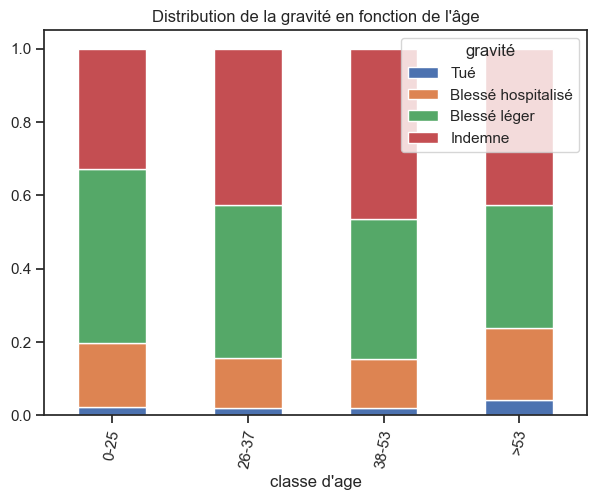

In [4]:
df_cross = pd.crosstab(df["classe d'age"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, title="Distribution de la gravité en fonction de l'âge")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation Gravité - Place

gravité       Tué  Blessé hospitalisé  Blessé léger   Indemne
place                                                        
1        0.024818            0.148360      0.365188  0.461634
2        0.021822            0.158504      0.470098  0.349575
3        0.016667            0.088384      0.508586  0.386364
4        0.011192            0.099608      0.519866  0.369334
5        0.026769            0.124283      0.449331  0.399618
6        0.014706            0.139706      0.411765  0.433824
7        0.032025            0.181818      0.366736  0.419421
8        0.031390            0.156951      0.486547  0.325112
9        0.037572            0.187861      0.321773  0.452794
10       0.051559            0.290792      0.624773  0.032876


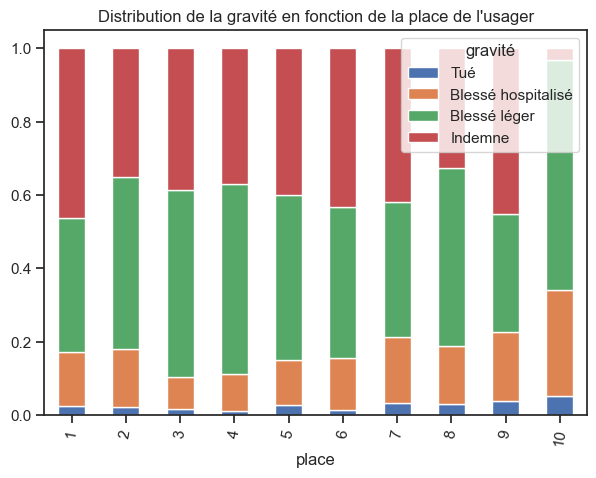

In [5]:
df_cross = pd.crosstab(df['place'], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction de la place de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation Gravité - Catégorie d'utilisateur

gravité                       Tué  Blessé hospitalisé  Blessé léger   Indemne
catégorie d'utilisateur                                                      
Conducteur               0.024842            0.148338      0.365164  0.461656
Passager                 0.021876            0.147359      0.464908  0.365856
Piéton                   0.051559            0.290792      0.624773  0.032876


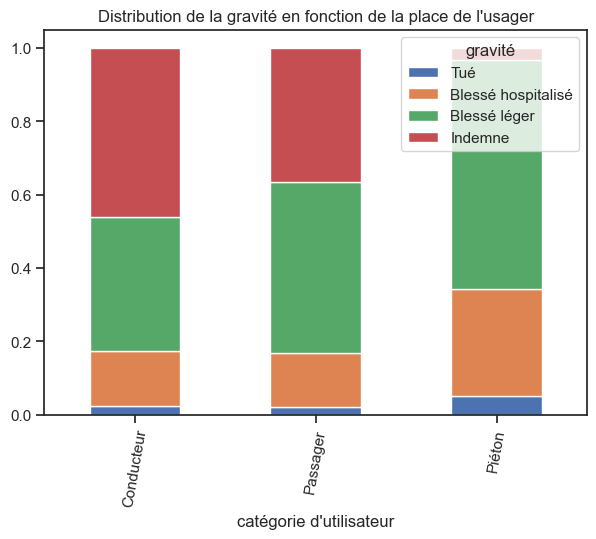

In [6]:
df_cross = pd.crosstab(df["catégorie d'utilisateur"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction de la place de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - sexe

gravité        Tué  Blessé hospitalisé  Blessé léger   Indemne
sexe_lbl                                                      
Féminin   0.018028            0.142218      0.472120  0.367634
Masculin  0.030197            0.167062      0.372216  0.430525


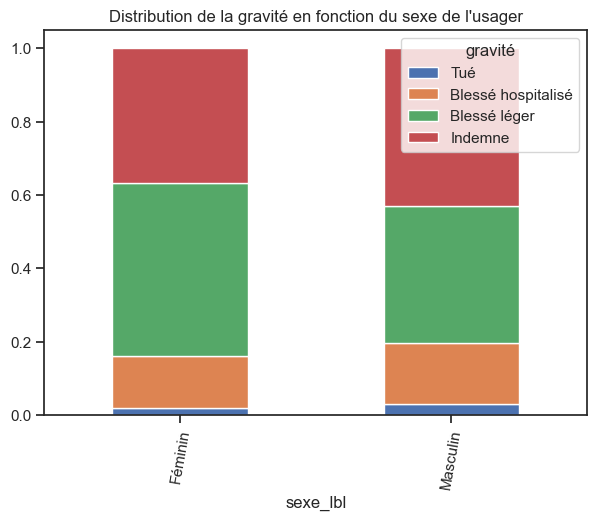

In [7]:
df_cross = pd.crosstab(df["sexe_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction du sexe de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")